In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Définir les stop words en français
stop_words_fr = set(stopwords.words('french'))
stop_words_en = set(stopwords.words('english'))
stop_words_all = stop_words_en.union(stop_words_fr)

# Exemple de texte
texte = "This is an easy example of a text. Ceci est un exemple de texte contenant des mots inutiles."
mots = texte.split()

# Filtrer les mots
mots_sans_stopwords = [mot for mot in mots if mot.lower() not in stop_words_all]
print(" ".join(mots_sans_stopwords))

easy example text. Ceci exemple texte contenant mots inutiles.


## Workcloud

In [5]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 330.3 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/301.2 kB 325.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.2 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\Malte\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

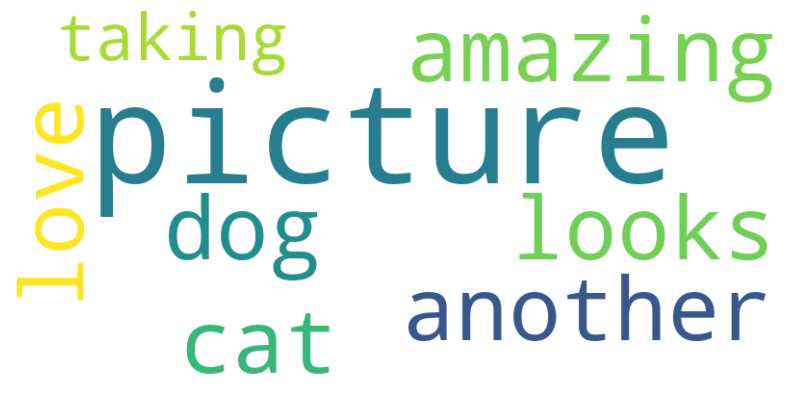

In [7]:

# Exemple de texte
dataset = [
    "This is a picture of a cat",
    "Another picture of a dog",
    "The picture looks amazing",
    "I love taking pictures",
]

# Tokeniser les mots (en minuscules pour uniformité)
words = " ".join(dataset).lower().split()

# Créer un compteur des mots restants
filtered_words = [word for word in words if word not in stop_words_all]
word_counts = Counter(filtered_words)

# Supprimer les mots fréquents non significatifs (ex. "picture")
frequent_words_to_remove = ['unknown', 'lyon', '', 'france', 'europe', 'nuit', 'streetphotography', 'french', 'rhônealpes', 'iphone']
filtered_words_final = [word for word in filtered_words if word not in frequent_words_to_remove]

# Générer un Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words_final))

# Visualiser le Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tokenization

In [14]:
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language

In [21]:
# Charger les modèles français et anglais
nlp_fr = spacy.load("fr_core_news_sm")
nlp_en = spacy.load("en_core_web_sm")

# Vérifie si la factory 'language_detector' est déjà enregistrée
if not Language.has_factory("language_detector"):
    @Language.factory("language_detector")
    def create_language_detector(nlp, name):
        return LanguageDetector()

# Ajouter le détecteur de langue au pipeline seulement s'il n'est pas déjà présent
if "language_detector" not in nlp_fr.pipe_names:
    nlp_fr.add_pipe("language_detector", last=True)

# Texte avec un mélange de français et d'anglais
texte = "Les enfants jouent outside dans le parc avec their dog."

# Détecter la langue de chaque phrase
doc = nlp_fr(texte)

# Traiter chaque segment en fonction de la langue détectée
tokens = []
for token in doc:
    # Créer un document temporaire pour analyser chaque mot seul
    token_doc = nlp_fr(token.text)
    detected_language = token_doc._.language['language']
    
    # Utiliser le modèle correspondant à la langue détectée
    if detected_language == 'en':
        processed_token = nlp_en(token.text)[0]  # Utiliser le modèle anglais
    else:
        processed_token = nlp_fr(token.text)[0]  # Utiliser le modèle français
    
    tokens.append((processed_token.text, processed_token.lemma_, detected_language))

# Afficher les résultats
print("Mots, lemmes et langues détectées :")
for mot, lemme, langue in tokens:
    print(f"Mot : {mot}, Lemme : {lemme}, Langue : {langue}")

Mots, lemmes et langues détectées :
Mot : Les, Lemme : le, Langue : fr
Mot : enfants, Lemme : enfant, Langue : ca
Mot : jouent, Lemme : jouent, Langue : fr
Mot : outside, Lemme : outside, Langue : et
Mot : dans, Lemme : dans, Langue : id
Mot : le, Lemme : le, Langue : fr
Mot : parc, Lemme : parc, Langue : es
Mot : avec, Lemme : avec, Langue : sv
Mot : their, Lemme : their, Langue : en
Mot : dog, Lemme : dog, Langue : pt
Mot : ., Lemme : ., Langue : UNKNOWN
